# TODO improve the entire notebook to showcase feature visulization n adversarial example

In [4]:
import matplotlib
%matplotlib inline
!python feature_viz.py

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - C:\Users\mishr\Desktop\dnn_milp_venv\lib\site-packages\pulp\solverdir\cbc\win\64\cbc.exe C:\Users\mishr\AppData\Local\Temp\7d196e8914e448be95606148d93983fd-pulp.mps max timeMode elapsed branch printingOptions all solution C:\Users\mishr\AppData\Local\Temp\7d196e8914e448be95606148d93983fd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 175 COLUMNS
At line 7006 RHS
At line 7177 BOUNDS
At line 7996 ENDATA
Problem MODEL has 170 rows, 886 columns and 6752 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 8871.45 - 0.01 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 9 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 5 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0004I processed model has 102 rows, 886 columns

In [1]:
import mip

m = mip.Model(solver_name="CBC")

x = {
      1: m.add_var(var_type=mip.INTEGER),
      2: m.add_var(var_type=mip.INTEGER)
}

m += 4 * x[1] >= 2 * x[2]
m += -2 * x[1] + 30 >= 2 * x[2]
m += x[2] >= 0
m += 0.5 * x[1] + 3.75 >= x[2]

m.objective = mip.minimize(-2 * x[1] - 3 * x[2])
solver_status = m.optimize()

print(f"Solver status: {solver_status}")
print(f"Optimal objective value: {round(m.objective_value)}")
print(f"Optimal solution: x1={round(x[1].x)}, x2={round(x[2].x)}")

Solver status: OptimizationStatus.OPTIMAL
Optimal objective value: -37
Optimal solution: x1=8, x2=7


Now Python Model for DNN1


In [4]:
import mip

m = mip.Model(solver_name="CBC")

x = {
      1: m.add_var(var_type=mip.INTEGER),
      2: m.add_var(var_type=mip.INTEGER)
}

m +=  2* x[1] + 3 * x[2] <= 13
m += x[1] >= 1
m += x[2] >= 2
m += x[1] <= 4

m.objective = mip.minimize(2* x[1] + 3 * x[2])
solver_status = m.optimize()

print(f"Solver status: {solver_status}")
print(f"Optimal objective value: {round(m.objective_value)}")
print(f"Optimal (minimize) solution: x1={round(x[1].x)}, x2={round(x[2].x)}")

m.objective = mip.maximize(2* x[1] + 3 * x[2])
solver_status = m.optimize()

print(f"Solver status: {solver_status}")
print(f"Optimal objective value: {round(m.objective_value)}")
print(f"Optimal (maximize) solution: x1={round(x[1].x)}, x2={round(x[2].x)}")

Solver status: OptimizationStatus.OPTIMAL
Optimal objective value: 8
Optimal (minimize) solution: x1=1, x2=2
Solver status: OptimizationStatus.OPTIMAL
Optimal objective value: 13
Optimal (maximize) solution: x1=2, x2=3


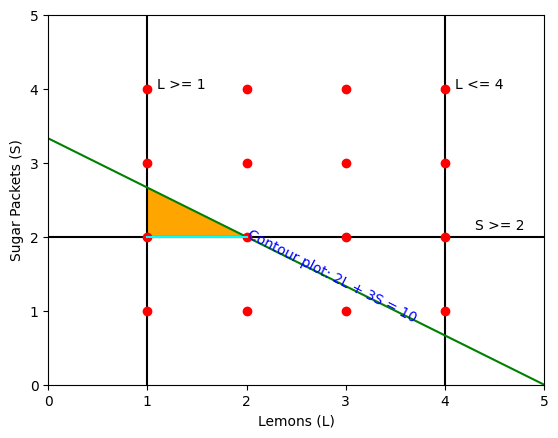

In [98]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(0,10))

plt.axhline(y=2, color='black')
plt.axvline(x=1, color='black')
plt.axvline(x=4,color='black')

# y = (-2*x + 11)/3
# plt.plot(x,y, color='green')
# plt.text(x[2],y[2], f'Contour plot: 2L + 3S = 11', color='blue', fontsize=10, rotation=-27, rotation_mode='anchor')


y = (-2*x + 10)/3
plt.plot(x,y, color='green')
plt.text(x[2],y[2], f'Contour plot: 2L + 3S = 10', color='blue', fontsize=10, rotation=-27, rotation_mode='anchor')


# y = (-2*x + 9)/3
# plt.plot(x,y, color='green')
# plt.text(x[2],y[2], f'Contour plot: 2L + 3S = 9', color='blue', fontsize=10, rotation=-27, rotation_mode='anchor')

# Define the range for x and y
x_range = range(1, 5) # Adjust as needed
y_range = range(1, 5) # Adjust as needed

# Create a plot (example plot, replace with your own data)
# plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'o-') # Example plot

# Overlay integer coordinates
for x in x_range:
    for y in y_range:
        plt.plot(x, y, 'ro')  # Red dot at each integer coordinate
        # plt.text(x, y, f'({x},{y})', color='blue', fontsize=8)

# Set limits and show the plot
plt.xlim(min(x_range)-1, max(x_range)+1)
plt.ylim(min(y_range)-1, max(y_range)+1)

plt.plot([1,2],[2,2], color='cyan')
shaded_region_xcor = np.array(np.arange(1,2,0.01))
shaded_region_ycor = (10-2*shaded_region_xcor)/3
plt.fill_between(shaded_region_xcor,shaded_region_ycor, 2, color='orange')

# plt.fill_between([1,2,3,4],2,5, color='orange')

plt.xlabel('Lemons (L)')
plt.ylabel('Sugar Packets (S)')

plt.text(4.3,2.1, 'S >= 2')
plt.text(1.1,4, 'L >= 1')
plt.text(4.1,4, 'L <= 4')
# plt.plot(4.2,2.1,marker=r'$\uparrow$')


plt.show()

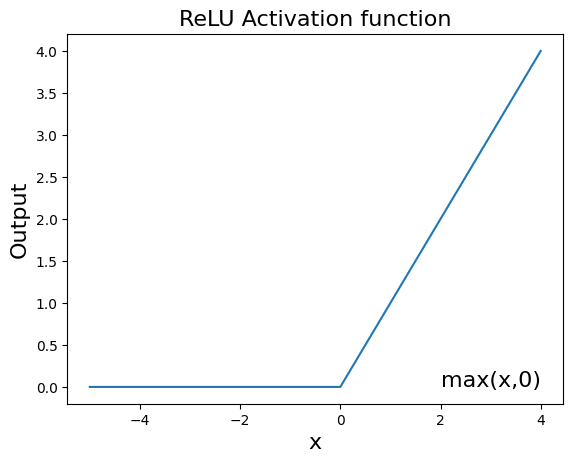

In [75]:
# ReLU
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(-5,5))
y = x * (x>0)

plt.plot(x,y)
plt.title('ReLU Activation function', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('Output', fontsize=16)
plt.text(2,0,'max(x,0)', fontsize=16)
plt.show()